In [1]:
import pandas as pd
import numpy as np
import json

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trial_data=pd.read_csv('data_files/probe_trialdata.csv',header=None)
question_data=pd.read_csv('data_files/probe_questiondata.csv',header=None)
event_data=pd.read_csv('data_files/probe_eventdata.csv',header=None)

In [3]:
exp1_subs=np.unique(question_data[712:][0]) # subjects that did this version of the study
print(len(exp1_subs))
print(exp1_subs)

139
['debug07BY44:debugBE7Z9N' 'debug0J9fw:debug39W0J' 'debug0izns:debugZ2iHU'
 'debug19lMm:debugUiFNq' 'debug1YAUU:debugJPQAT' 'debug20QgL:debugDyICu'
 'debug26vse:debugR3Agl' 'debug2FTyl:debugGncPa' 'debug2LvDu:debugV32zh'
 'debug2Mj1Y:debugBBWKj' 'debug2ieYE:debug92sb7' 'debug30eYX:debugpwEKv'
 'debug4Kps0:debug4fG4D' 'debug4Sgjy:debugTQAGE' 'debug7Eumu:debug4btcn'
 'debug7hwht:debugz5Nro' 'debug8W1Uy:debugj2L8M' 'debug93JLw:debugR5Ld1'
 'debug9BEep:debugtTzA2' 'debug9GH3Y:debugo010z' 'debug9ZoRm:debugw5cUk'
 'debug9wyVB:debugcIcCI' 'debugBIFAWQ:debugBX7YIE' 'debugBKsVe:debugN7mkh'
 'debugBY8Fr:debugaigBr' 'debugBbmu1:debugfJzHl' 'debugBx23R:debug52cgy'
 'debugCncNG:debugbwj5M' 'debugDF3t3:debugDCEN9' 'debugDOgWA:debugEG23M'
 'debugEeE98:debugDbY3a' 'debugEx8wN:debuggOnms' 'debugFAR8a:debugBwNia'
 'debugFLCue:debugEPGon' 'debugFPHyC:debugVd1hA' 'debugFmqbJ:debugmHku2'
 'debugG2GQq:debugmAPMC' 'debugH1RD6:debugJW1Vh' 'debugHCXMt:debugpkyAP'
 'debugHhtIg:debugV6fFv' 'debugITqJz:debug9

In [5]:
len(question_data)

1401

In [6]:
idx_to_use=[]

for ppt in exp1_subs:
    if sum(question_data[0]==ppt) > 1:
        idx_to_use.extend(np.where(question_data[0]==ppt)[0])
    
actual_question=question_data.iloc[idx_to_use,:]
actual_question.columns=['id','question','answer']
actual_question=actual_question.pivot(index='id',columns='question',values='answer')

In [7]:
actual_question.head()

question,comments,difficulty,engagement,instructionloops,switch_tabs,vid_quality
id,,,,,,
debug07BY44:debugBE7Z9N,NaN,10,7,1,No,Yes
debug0J9fw:debug39W0J,NaN,7,8,1,No,Yes
debug0izns:debugZ2iHU,NaN,6,10,1,No,Yes
debug19lMm:debugUiFNq,The task was quite long and it became a bit bo...,5,5,1,No,Yes
debug1YAUU:debugJPQAT,No,4,4,1,No,Yes


In [8]:
print(len(actual_question))

110


difficulty : M=5.25
engagement : M=6.60


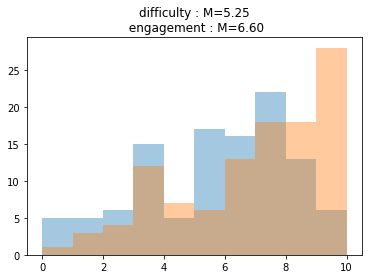

In [9]:
for question in ['difficulty','engagement']:
    
    print('%s : M=%0.2f' %(question, np.nanmean(np.array(actual_question[question],dtype=float))))
    plt.title('difficulty : M=5.25\n engagement : M=6.60')
    plt.hist(np.array(actual_question[question],dtype=float),alpha=0.4)

In [10]:
print(np.array(actual_question['comments']))

[nan nan nan
 'The task was quite long and it became a bit boring after a while. I found myself counting down the number of tasks left until I finished.'
 'No' nan nan 'none' nan nan nan nan nan
 'One of the videos, I think number 78 if I recall correctly had a double countdown for some reason. Also I wonder if some videos had multiple pauses and we were not told to look for these'
 nan 'no' nan 'Quite a tedious task' nan nan
 'I have no further comments or questions.' nan nan
 'I got very bored and ended up paying attention to what number I was on by around 36.'
 nan nan nan 'Brilliant study - I really enjoyed particpating. '
 "I found the scale slightly unclear as I would interpret 'not confident' and 'unsure' as the same thing so I found myself hovering between 'unsure' and 'very confident' more"
 nan nan nan nan 'Interesting study, thank you.' nan nan nan nan nan nan
 nan 'Good fun, thanks for the invite :)' 'nothing to add' nan nan
 "really interesting experiment, would've liked a

In [11]:
idx_to_use=[]

for ppt in actual_question.index:
    idx_to_use.extend(np.where(trial_data[0]==ppt)[0])
    temp=[x for x in np.array(trial_data)[np.where(trial_data[0]==ppt)[0],3] if 'TrialName' in x]
    print('Num trials:',len(temp))
    
actual_data=trial_data.iloc[idx_to_use,:]

Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials: 96
Num trials

In [21]:
for idx in actual_data.index:
    actual_data[3][idx]=json.loads(actual_data[3][idx])
    
actual_data.head()

np.save('trialdata_dict_110',actual_data,allow_pickle=True)

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


## Start analyses

In [4]:
import numpy as np

In [5]:
iti=200
countdown=3000

min_rt=300
max_rt=2500

In [6]:
actual_data=np.load('trialdata_dict_110.npy',allow_pickle=True)

In [7]:
movie_loc='/gpfs/milgram/scratch/turk-browne/tsy6/physical_events/movies/'

In [8]:
for sub in np.unique(actual_data[:,0]):
    sub_trials=actual_data[actual_data[:,0]==sub,3]
    #real_trials=[x for x in sub_trials if 'TrialName' in x]
    
    conf_vals=[]
    for trial in sub_trials:
        if 'TrialName' in trial:
            conf_vals.append(np.int(trial['Confidence']))
        else:
            conf_vals.append(np.nan)
    
    zscore_conf=(conf_vals-np.nanmean(conf_vals))/np.nanstd(conf_vals)

    for t, trial in enumerate(sub_trials):
        if 'TrialName' in trial:
            trial['Zscore_Conf']=zscore_conf[t]                     
                    
            
    actual_data[actual_data[:,0]==sub,3]=sub_trials

In [9]:
real_trials=[x for x in actual_data[:,3] if 'TrialName' in x]
print(len(real_trials))

10560


In [10]:
real_trials[:5]

[{'TrialName': 'collision_occlusion315/final_collision_occlusion315_125ms_45.mp4',
  'Spacebar': [12857],
  'Confidence': '36',
  'IsInstruction': False,
  'TrialOrder': 0,
  'Zscore_Conf': -0.4842782366592075},
 {'TrialName': 'collision_falling3998/final_collision_falling3998_125ms_7.mp4',
  'Spacebar': [],
  'Confidence': '39',
  'IsInstruction': False,
  'TrialOrder': 1,
  'Zscore_Conf': -0.2450464490814171},
 {'TrialName': 'containment_collision314/final_containment_collision314_125ms_15.mp4',
  'Spacebar': [9484],
  'Confidence': '81',
  'IsInstruction': False,
  'TrialOrder': 2,
  'Zscore_Conf': 3.104198577007649},
 {'TrialName': 'falling_occlusion5998/final_falling_occlusion5998_125ms_14.mp4',
  'Spacebar': [],
  'Confidence': '38',
  'IsInstruction': False,
  'TrialOrder': 3,
  'Zscore_Conf': -0.3247903782740139},
 {'TrialName': 'collision_occlusion3311/final_collision_occlusion3311_125ms_28.mp4',
  'Spacebar': [],
  'Confidence': '67',
  'IsInstruction': False,
  'TrialOrder':

In [11]:
remove_extra=1
restrict_rt=1

# set them all up together
names=[]
probe=[]
space_bars=[]
confidence=[]
confidence_z=[]
pixel_change=[]
rts=[]

extra_spaces=[]
outofrange_rt=[]

for trial in real_trials:
    
    probe_num=trial['TrialName'].split('_')[-1].split('.')[0]
    
    ignore_trial=False # preset
    
    
    if len(trial['Spacebar'])==0:
        space_timing=np.nan
        rt_val=np.nan
        
    elif len(trial['Spacebar'])>1:
        
        # do you want to remove the trials when the pressed the space bar multiple times? or just the first spacebar?
        if remove_extra==1: 
            rt_val=np.nan
            ignore_trial=True
            
        else: 
            space_timing=trial['Spacebar'][0]
            rt_val=(space_timing-countdown)-int(probe_num)*iti
        
        extra_spaces.append(trial['TrialName'])
        
    else:
        space_timing=trial['Spacebar'][0]
        rt_val=(space_timing-countdown)-int(probe_num)*iti
    
    if 'non-visible' in trial['TrialName']:
        probe_type = 0 # not a probe
        avg_pix_change=np.nan # no pixel change calculation here
        
    else:
        
        probe_type = 1 # yes it's a probe
        
        file='pixel_changes/'+trial['TrialName'].split('/')[0]+'_pixel_changes.json'
        with open(file) as f:
            video_dict=json.load(f)
        
        avg_pix_change=video_dict[movie_loc+trial['TrialName']]
        
        
    # remember the trials with out of range RTs
    if rt_val > max_rt or rt_val < min_rt:
        
        outofrange_rt.append(rt_val)
        
        if restrict_rt==1:
            ignore_trial=True
    
    # only save if the trial isn't bein excluded for some reason
    if ignore_trial==False:
        names.append(trial['TrialName'])
        probe.append(probe_type)
        space_bars.append(space_timing)
        confidence.append(np.int(trial['Confidence']))
        confidence_z.append(float(trial['Zscore_Conf']))
        pixel_change.append(avg_pix_change)
        rts.append(rt_val)    


names=np.array(names)
probe=np.array(probe)
space_bars=np.array(space_bars)
confidence=np.array(confidence)
confidence_z=np.array(confidence_z)
pixel_change=np.array(pixel_change)
rts=np.array(rts)

if remove_extra==1 and len(extra_spaces)>1:        
    print('*Ignoring %d trials (%0.2f percent) for multiple space bar presses' %(len(extra_spaces),len(extra_spaces)/len(real_trials)*100))
else:
    print('*Using the first space bar press for %d (%0.2f percent) trials for multiple space bar presses' %(len(extra_spaces),len(extra_spaces)/len(real_trials)*100))
    
if restrict_rt==1 and len(outofrange_rt)>1:    
    print('*Ignoring %d trials (%0.2f percent) for RTs that were out of range' %(len(outofrange_rt),len(outofrange_rt)/len(real_trials)*100))
else:
    print('*Including %d trials (%0.2f percent) with unexpected RTs' %(len(outofrange_rt),len(outofrange_rt)/len(real_trials)*100))    
    
print('Total number of trials used: %d (%0.2f percent)' %(len(names),len(names)/len(real_trials)*100))


*Ignoring 145 trials (1.37 percent) for multiple space bar presses
*Ignoring 946 trials (8.96 percent) for RTs that were out of range
Total number of trials used: 9469 (89.67 percent)


No probe trials: N = 3212; Mean Conf= 76.04
Percentage of probes not detected: 0.99

Probe trials: N = 6257; Mean Conf= 74.92
Percentage of probes not detected: 0.39


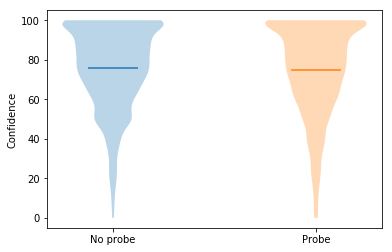

In [12]:
fig=plt.figure()

nonprobe_idxs=np.where(np.array(probe)==0)
probe_idxs=np.where(np.array(probe)==1)

plt.violinplot(confidence[nonprobe_idxs],positions=[0],showextrema=False,showmeans=True)
plt.violinplot(confidence[probe_idxs],positions=[1],showextrema=False,showmeans=True)
plt.xticks([0,1],['No probe','Probe'])
plt.ylabel('Confidence')


print('No probe trials: N = %d; Mean Conf= %0.2f'%(len(confidence[nonprobe_idxs]),np.mean(confidence[nonprobe_idxs])))
print('Percentage of probes not detected: %0.2f'% (sum(np.array(np.isnan(space_bars[nonprobe_idxs])))/len(space_bars[nonprobe_idxs])))
print()

print('Probe trials: N = %d; Mean Conf= %0.2f'% (len(confidence[probe_idxs]),np.mean(confidence[probe_idxs])))
print('Percentage of probes not detected: %0.2f'% (sum(np.array(np.isnan(space_bars[probe_idxs])))/len(space_bars[probe_idxs])))


fig.savefig('pngs/exp2_tempprobe/confidence_by_probe_condition.png')

No probe; 
not detected
3171
76.27562283191422

No probe; 
detected
41
57.48780487804878

Probe; 
not detected
2471
68.04775394577095

Probe; 
detected
3786
79.40729001584786



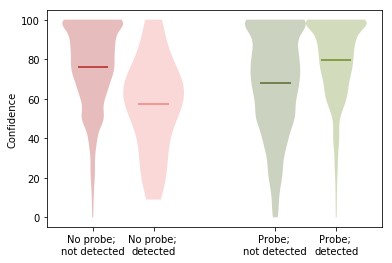

In [13]:
fig=plt.figure()
colors=['firebrick','lightcoral','darkolivegreen','olivedrab']
positions=[0,0.5,1.5,2]
conditions=['No probe; \nnot detected',
                          'No probe; \ndetected','Probe; \nnot detected','Probe; \ndetected']

values=[[confidence[nonprobe_idxs],space_bars[nonprobe_idxs]],[confidence[nonprobe_idxs],space_bars[nonprobe_idxs]],
        [confidence[probe_idxs],space_bars[probe_idxs]],[confidence[probe_idxs],space_bars[probe_idxs]]]

conf_vals=[]
isprobe=[]
isdetected=[]

for i in range(len(values)):
    print(conditions[i])
    if  i % 2 == 0: # on even numbers
        
        temp_vals=np.array(values[i][0])[np.array(np.isnan(values[i][1]))]
        
        print(len(temp_vals))
        print(np.nanmean(temp_vals))
        
        try:
            v=plt.violinplot(temp_vals[~np.isnan(temp_vals)],positions=[positions[i]],showextrema=False,showmeans=True)
            v['bodies'][0].set_facecolor(colors[i])
            v['cmeans'].set_color(colors[i])
        except:
            print('unable to plot')
        conf_vals.extend(temp_vals)
        
        length=len(temp_vals)
        isdetected.extend(np.ones(length))
        
    else:
        
        temp_vals=np.array(values[i][0])[np.array(~np.isnan(values[i][1]))]
        
        print(len(temp_vals))
        print(np.nanmean(temp_vals))

        try:
            v=plt.violinplot(temp_vals[~np.isnan(temp_vals)],positions=[positions[i]],showextrema=False,showmeans=True)
            v['bodies'][0].set_facecolor(colors[i])
            v['cmeans'].set_color(colors[i])
        except:
            print('unable to plot')
            
        conf_vals.extend(temp_vals)
       
        length=len(temp_vals)
        isdetected.extend(np.zeros(length))
        
    if i < 2:
        isprobe.extend(np.zeros(length))
    else:
        isprobe.extend(np.ones(length))
    
    print()

plt.xticks([0,0.5,1.5,2],conditions)
plt.ylabel('Confidence')


fig.savefig('pngs/exp2_tempprobe/confidence_by_probe_condition_detection.png')

No probe; 
not detected
3171
0.10950737220956003

No probe; 
detected
41
-0.7981707898565301

Probe; 
not detected
2471
-0.3157517612694781

Probe; 
detected
3786
0.28568319785073515



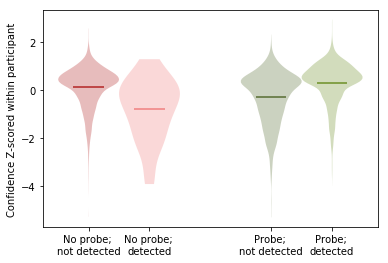

In [14]:
fig=plt.figure()

colors=['firebrick','lightcoral','darkolivegreen','olivedrab']
positions=[0,0.5,1.5,2]

values=[[confidence_z[nonprobe_idxs],space_bars[nonprobe_idxs]],[confidence_z[nonprobe_idxs],space_bars[nonprobe_idxs]],
        [confidence_z[probe_idxs],space_bars[probe_idxs]],[confidence_z[probe_idxs],space_bars[probe_idxs]]]

conf_vals=[]
isprobe=[]
isdetected=[]

for i in range(len(values)):
    print(conditions[i])
    if  i % 2 == 0: # on even numbers
        
        temp_vals=np.array(values[i][0])[np.array(np.isnan(values[i][1]))]
        
        print(len(temp_vals))
        print(np.nanmean(temp_vals))
        
        try:
            v=plt.violinplot(temp_vals[~np.isnan(temp_vals)],positions=[positions[i]],showextrema=False,showmeans=True)
            v['bodies'][0].set_facecolor(colors[i])
            v['cmeans'].set_color(colors[i])
        except:
            print('unable to plot')
        conf_vals.extend(temp_vals)
        
        length=len(temp_vals)
        isdetected.extend(np.ones(length))
        
    else:
        
        temp_vals=np.array(values[i][0])[np.array(~np.isnan(values[i][1]))]
        
        print(len(temp_vals))
        print(np.nanmean(temp_vals))
        
        try:
            v=plt.violinplot(temp_vals[~np.isnan(temp_vals)],positions=[positions[i]],showextrema=False,showmeans=True)
            v['bodies'][0].set_facecolor(colors[i])
            v['cmeans'].set_color(colors[i])
        
        except:
            print('unable to plot')
            
        conf_vals.extend(temp_vals)
       
        length=len(temp_vals)
        isdetected.extend(np.zeros(length))
        
    if i < 2:
        isprobe.extend(np.zeros(length))
    else:
        isprobe.extend(np.ones(length))
        
    print()

plt.xticks([0,0.5,1.5,2],conditions)
plt.ylabel('Confidence Z-scored within participant')

fig.savefig('pngs/exp2_tempprobe/confidence_z_by_probe_condition.png')


In [15]:
df=pd.DataFrame({'value':conf_vals,'probe_group':isprobe,'detected_group':isdetected})
df.to_csv('anova_data.csv')

In [16]:
probe_position=np.array([i.split('_')[-1].split('.')[0] for i in names[probe_idxs]],dtype=int)

In [17]:
space_bars[probe_idxs]

array([12857.,    nan,    nan, ...,    nan,    nan, 12479.])

In [18]:
temp=np.array(space_bars[probe_idxs])
temp[~np.isnan(temp)]=1
temp[np.isnan(temp)]=0

In [19]:
average_detection=[]
for pos in np.unique(probe_position):
    average_detection.append(np.nanmean(temp[np.where(probe_position==pos)[0]]))

LinregressResult(slope=-0.005903386173217073, intercept=0.7190773915637749, rvalue=-0.5775702039698566, pvalue=7.197986760781099e-07, stderr=0.0010683243199165822)


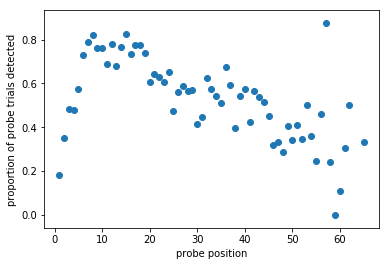

In [20]:
fig=plt.figure()
plt.scatter(np.unique(probe_position),average_detection)
plt.xlabel('probe position')
plt.ylabel('proportion of probe trials detected')

print(stats.linregress(np.unique(probe_position),average_detection))

fig.savefig('pngs/exp2_tempprobe/detection_by_probe_position.png')

In [21]:
detected=np.array(space_bars)
detected[~np.isnan(detected)]=1
detected[np.isnan(detected)]=0

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


LinregressResult(slope=-0.04502170312948989, intercept=0.6081225675535252, rvalue=-0.004379999102935393, pvalue=0.7292327585818524, stderr=0.13005969839432374)


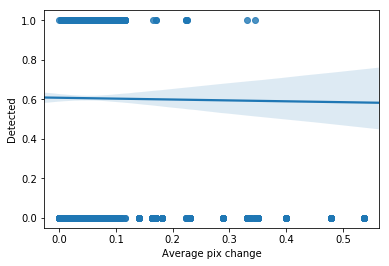

In [22]:
sns.regplot(pixel_change,detected)
plt.xlabel('Average pix change')
plt.ylabel('Detected')

print(stats.linregress(pixel_change[~np.isnan(pixel_change)],detected[~np.isnan(pixel_change)]))

In [23]:
average_detection=[]
average_pix_change=[]
for name in np.unique(names):
    
    average_detection.append(np.nanmean(detected[np.where(names==name)[0]]))
    average_pix_change.append(np.nanmean(pixel_change[np.where(names==name)[0]]))
    
average_detection=np.array(average_detection)
average_pix_change=np.array(average_pix_change)

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [24]:
len(average_detection)

736

LinregressResult(slope=0.0014726846055473203, intercept=0.04685748252601537, rvalue=0.009424612140580168, pvalue=0.8030154899645228, stderr=0.005901575440138455)


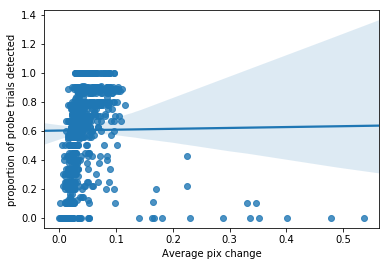

In [28]:
fig=plt.figure()

sns.regplot(average_pix_change,average_detection)
plt.xlabel('Average pix change')
plt.ylabel('proportion of probe trials detected')

print(stats.linregress(np.array(average_detection)[~np.isnan(average_pix_change)],
                       np.array(average_pix_change)[~np.isnan(average_pix_change)]))

fig.savefig('pngs/exp2_tempprobe/detection_by_pix_change.png')

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


LinregressResult(slope=0.03847137746809312, intercept=0.017364857257766663, rvalue=0.5088679955261918, pvalue=9.631517695024192e-46, stderr=0.0025087062295049054)


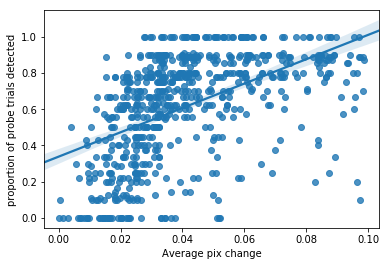

In [27]:
fig=plt.figure()

sns.regplot(average_pix_change[average_pix_change<0.1],average_detection[average_pix_change<0.1])
plt.xlabel('Average pix change')
plt.ylabel('proportion of probe trials detected')

print(stats.linregress(average_detection[average_pix_change<0.1],
                       average_pix_change[average_pix_change<0.1]))

fig.savefig('pngs/exp2_tempprobe/detection_by_pix_change_zoomed.png')

In [134]:
from sklearn.linear_model import LogisticRegression
logres=LogisticRegression()
nans=np.isnan(np.array(pixel_change[probe_idxs]))
logres.fit(np.array(pixel_change[probe_idxs])[~nans].reshape(-1,1),detected[probe_idxs][~nans])

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [135]:
logres.coef_

array([[-0.14072645]])

### Probe detection by event boundaries

In [29]:
movie_loc='/gpfs/milgram/scratch/turk-browne/tsy6/physical_events/movies/'

In [30]:
with open('boundary_dictionary.json') as f:
    boundary_info = json.load(f)

In [31]:
detected=np.array(space_bars)
detected[~np.isnan(detected)]=1

In [32]:
probes_boundaries_names=[]
probes_boundaries_num=[]
probes_boundaries=[]
probes_boundaries_conf=[]
probes_boundaries_pix=[]
probes_boundaries_rts=[]

probes_non_boundaries_names=[]
probes_non_boundaries_num=[]
probes_non_boundaries=[]
probes_non_boundaries_conf=[]
probes_non_boundaries_pix=[]
probes_non_boundaries_rts=[]

boundaries=[]

for i, probe in enumerate(names):
    
    if i in probe_idxs[0]: # if its a probe trial 
        base=probe.split('/')[0]
        probe_num=probe.split('_')[-1].split('.')[0]

        boundary_locations=np.hstack(list(boundary_info[base].values()))

        if np.int(probe_num) in boundary_locations:
            probes_boundaries_names.append(names[i])
            probes_boundaries_num.append(probe_num)
            probes_boundaries.append(detected[i])
            probes_boundaries_conf.append(confidence[i])
            probes_boundaries_pix.append(pixel_change[i])
            probes_boundaries_rts.append(rts[i])

        else:
            probes_non_boundaries_names.append(names[i])
            probes_non_boundaries_num.append(probe_num)
            probes_non_boundaries.append(detected[i])
            probes_non_boundaries_conf.append(confidence[i])
            probes_non_boundaries_pix.append(pixel_change[i])
            probes_non_boundaries_rts.append(rts[i])

probes_boundaries_names=np.array(probes_boundaries_names)            
probes_non_boundaries_names=np.array(probes_non_boundaries_names)              
            
probes_boundaries_num=np.array(probes_boundaries_num,dtype=int)      
probes_non_boundaries_num=np.array(probes_non_boundaries_num,dtype=int)        

probes_boundaries=np.array(probes_boundaries)
probes_non_boundaries=np.array(probes_non_boundaries)

probes_boundaries_conf=np.array(probes_boundaries_conf)
probes_non_boundaries_conf=np.array(probes_non_boundaries_conf)

probes_boundaries_pix=np.array(probes_boundaries_pix)
probes_non_boundaries_pix=np.array(probes_non_boundaries_pix)

probes_boundaries_rts=np.array(probes_boundaries_rts)
probes_non_boundaries_rts=np.array(probes_non_boundaries_rts)

In [33]:
print('Boundaries detected: %d/%d = %f'%(np.sum(probes_boundaries==1),len(probes_boundaries),
                                          np.sum(probes_boundaries==1)/len(probes_boundaries)))
print('Non boundaries detected: %d/%d = %f'%(np.sum(probes_non_boundaries==1),len(probes_non_boundaries),
                                          np.sum(probes_non_boundaries==1)/len(probes_non_boundaries)))


Boundaries detected: 175/483 = 0.362319
Non boundaries detected: 3611/5774 = 0.625390


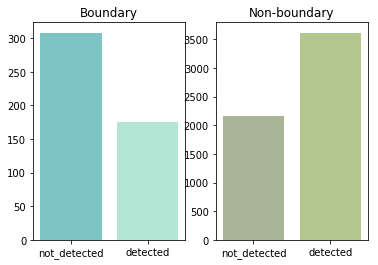

In [34]:
fig,ax=plt.subplots(1,2)

ax[0].set_title('Boundary')
ax[0].bar([0.5,1.5],[np.sum(np.isnan(probes_boundaries)),np.sum(probes_boundaries==1)],color=['darkcyan','mediumaquamarine'],alpha=0.5)
ax[0].set_xticks([0.5,1.5])
ax[0].set_xticklabels(['not_detected','detected'])

ax[1].set_title('Non-boundary')
ax[1].bar([0.5,1.5],[np.sum(np.isnan(probes_non_boundaries)),np.sum(probes_non_boundaries==1)],color=['darkolivegreen','olivedrab'],alpha=0.5)
ax[1].set_xticks([0.5,1.5])
ax[1].set_xticklabels(['not_detected','detected'])


fig.savefig('pngs/exp2_tempprobe/detection_by_boundary_condition.png')

In [35]:
table=[[np.sum(np.isnan(probes_boundaries)),np.sum(probes_boundaries==1)],
       [np.sum(np.isnan(probes_non_boundaries)),np.sum(probes_non_boundaries==1)]]
print(table)

[[308, 175], [2163, 3611]]


In [36]:
stats.fisher_exact(table, alternative='two-sided')

(2.9382154415164123, 5.704390513156264e-29)

Boundary trials: N = 483; Mean Conf= 68.503
Non-boundary trials: N = 5774; Mean Conf= 75.458


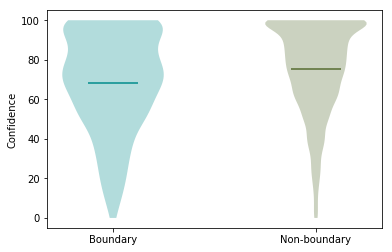

In [37]:
fig=plt.figure()

v=plt.violinplot(probes_boundaries_conf[~np.isnan(probes_boundaries_conf)],positions=[0],showextrema=False,showmeans=True)
v['bodies'][0].set_facecolor('darkcyan')
v['cmeans'].set_color('darkcyan')

v=plt.violinplot(probes_non_boundaries_conf[~np.isnan(probes_non_boundaries_conf)],positions=[1],showextrema=False,showmeans=True)
v['bodies'][0].set_facecolor('darkolivegreen')
v['cmeans'].set_color('darkolivegreen')

plt.xticks([0,1],['Boundary','Non-boundary'])
plt.ylabel('Confidence')


print('Boundary trials: N = %d; Mean Conf= %0.3f'%(len(probes_boundaries_conf),np.nanmean(probes_boundaries_conf)))
print('Non-boundary trials: N = %d; Mean Conf= %0.3f'% (len(probes_non_boundaries_conf),np.nanmean(probes_non_boundaries_conf)))


fig.savefig('pngs/exp2_tempprobe/confidence_by_boundary_condition.png')



In [38]:
stats.ttest_ind(probes_boundaries_conf,probes_non_boundaries_conf,nan_policy='omit')

Ttest_indResult(statistic=-6.3881567634718435, pvalue=1.7997932961966168e-10)

308
68.79545454545455
175
67.98857142857143
2163
67.94128525196486
3611
79.96067571309887


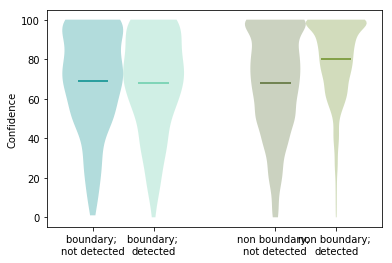

In [39]:
fig=plt.figure()

colors=['darkcyan','mediumaquamarine','darkolivegreen','olivedrab']
positions=[0,0.5,1.5,2]
values=[[probes_boundaries_conf,probes_boundaries],[probes_boundaries_conf,probes_boundaries],
        [probes_non_boundaries_conf,probes_non_boundaries],[probes_non_boundaries_conf,probes_non_boundaries]]

conf_vals=[]
isboundary=[]
isdetected=[]

for i in range(len(values)):
    if  i % 2 == 0: # on even numbers
        
        temp_vals=np.array(values[i][0])[np.array(np.isnan(values[i][1]))]
        
        print(len(temp_vals))
        print(np.nanmean(temp_vals))
        
        v=plt.violinplot(temp_vals[~np.isnan(temp_vals)],positions=[positions[i]],showextrema=False,showmeans=True)
        v['bodies'][0].set_facecolor(colors[i])
        v['cmeans'].set_color(colors[i])
        
        conf_vals.extend(temp_vals)
        
        length=len(temp_vals)
        isdetected.extend(np.ones(length))
        
    else:
        
        temp_vals=np.array(values[i][0])[np.array(~np.isnan(values[i][1]))]
        
        print(len(temp_vals))
        print(np.nanmean(temp_vals))

        v=plt.violinplot(temp_vals[~np.isnan(temp_vals)],positions=[positions[i]],showextrema=False,showmeans=True)
        v['bodies'][0].set_facecolor(colors[i])
        v['cmeans'].set_color(colors[i])
        
        conf_vals.extend(temp_vals)
       
        length=len(temp_vals)
        isdetected.extend(np.zeros(length))
        
    if i < 2:
        isboundary.extend(np.ones(length))
    else:
        isboundary.extend(np.zeros(length))

        
plt.xticks([0,0.5,1.5,2],['boundary; \nnot detected',
                          'boundary; \ndetected','non boundary; \nnot detected','non boundary; \ndetected'])
plt.ylabel('Confidence')


fig.savefig('pngs/exp2_tempprobe/confidence_by_boundary_condition_detection.png')


In [40]:
df=pd.DataFrame({'value':conf_vals,'boundary_group':isboundary,'detected_group':isdetected})
df.to_csv('anova_data_boundary.csv')

In [41]:
temp=np.array(probes_boundaries)
temp[~np.isnan(temp)]=1
temp[np.isnan(temp)]=0

In [42]:
average_detection_boundary=[]
for pos in np.unique(probes_boundaries_num):
    average_detection_boundary.append(np.nanmean(temp[np.where(probes_boundaries_num==pos)[0]]))

LinregressResult(slope=-0.0032647023937679128, intercept=0.4445260497375952, rvalue=-0.2289280612957484, pvalue=0.22366094018415517, stderr=0.002623470778879424)


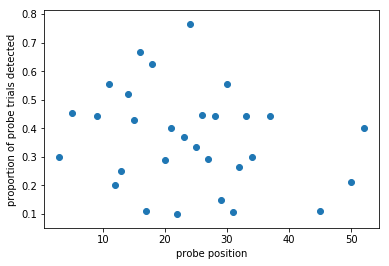

In [43]:
plt.scatter(np.unique(probes_boundaries_num),average_detection_boundary)
plt.xlabel('probe position')
plt.ylabel('proportion of probe trials detected')

print(stats.linregress(np.unique(probes_boundaries_num),average_detection_boundary))

In [44]:
temp=np.array(probes_non_boundaries)
temp[~np.isnan(temp)]=1
temp[np.isnan(temp)]=0

In [45]:
average_detection_non_boundary=[]
for pos in np.unique(probes_non_boundaries_num):
    average_detection_non_boundary.append(np.nanmean(temp[np.where(probes_non_boundaries_num==pos)[0]]))

LinregressResult(slope=-0.0062472149195659235, intercept=0.745563885172125, rvalue=-0.5873604677084255, pvalue=4.186547561257248e-07, stderr=0.0011021482436508767)


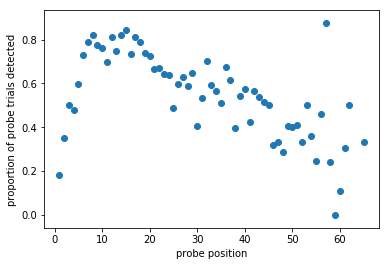

In [46]:
plt.scatter(np.unique(probes_non_boundaries_num),average_detection_non_boundary)
plt.xlabel('probe position')
plt.ylabel('proportion of probe trials detected')

print(stats.linregress(np.unique(probes_non_boundaries_num),average_detection_non_boundary))

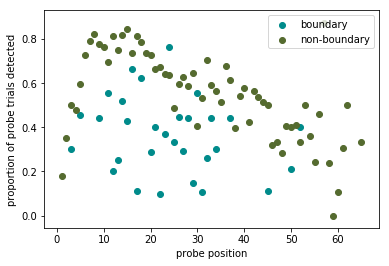

In [47]:
plt.scatter(np.unique(probes_boundaries_num),average_detection_boundary,color='darkcyan')
plt.scatter(np.unique(probes_non_boundaries_num),average_detection_non_boundary,color='darkolivegreen')
plt.xlabel('probe position')
plt.ylabel('proportion of probe trials detected')
plt.legend(['boundary','non-boundary'])

### Distance to the probe

In [48]:
all_distances=[]
all_spacebars=[]

for i, probe in enumerate(names):
    if i in probe_idxs[0]:
        base=probe.split('/')[0]
        probe_num=probe.split('_')[-1].split('.')[0]

        boundary_locations=np.hstack(list(boundary_info[base].values()))

        distances=np.array(boundary_locations)-np.int(probe_num)
        space=space_bars[i]
        
        # recode
        if np.isnan(space):
            space=0
        else:
            space=1
            
        all_distances.extend(distances)
        all_spacebars.extend(np.ones(len(distances))*space)

actual_distances=[]     
actual_spaces=[]

for i in np.unique(all_distances):
    
    spaces=np.array(all_spacebars)[np.array(all_distances)==i]
    actual_distances.append(i)
    actual_spaces.append(np.mean(spaces))

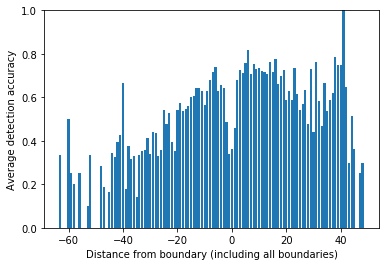

In [50]:
fig=plt.figure()

plt.bar(actual_distances,actual_spaces)
plt.ylim(0,1)
plt.xlabel('Distance from boundary (including all boundaries)')
plt.ylabel('Average detection accuracy')

fig.savefig('pngs/exp2_tempprobe/detection_by_distance_to_boundary.png')


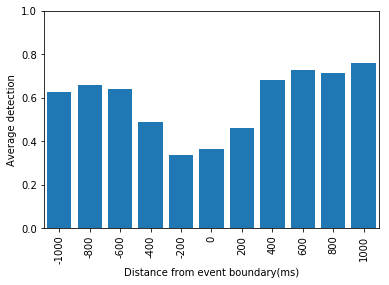

In [51]:
fig=plt.figure()

plt.bar(actual_distances,actual_spaces)
plt.xlim(-5.5,5.5)
plt.ylim(0,1)
plt.xticks(np.arange(-5,6),np.arange(-5,6)*200,rotation=90)
plt.xlabel('Distance from event boundary(ms)')
plt.ylabel('Average detection')

fig.savefig('pngs/exp2_tempprobe/detection_by_distance_to_boundary_zoomed.png')

In [52]:
top_distance=[]
top_spacebars=[]

for i, probe in enumerate(names):
    if i in probe_idxs[0]:
        base=probe.split('/')[0]
        probe_num=probe.split('_')[-1].split('.')[0]

        boundary_locations=np.hstack(list(boundary_info[base].values()))

        distances=np.array(boundary_locations)-np.int(probe_num)
        space=space_bars[i]
        
        min_idx=np.argmin(np.abs(distances))
        
        # recode
        if np.isnan(space):
            space=0
        else:
            space=1
            
        top_distance.append(np.array(distances)[min_idx])
        top_spacebars.append(space)
        
top_actual_distances=[]     
top_actual_spaces=[]

for i in np.unique(top_distance):
    
    spaces=np.array(top_spacebars)[np.array(top_distance)==i]
    top_actual_distances.append(i)
    top_actual_spaces.append(np.mean(spaces))

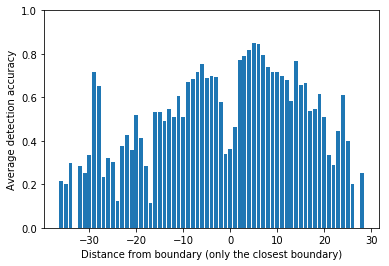

In [53]:
fig=plt.figure()

plt.bar(top_actual_distances,top_actual_spaces)
plt.ylim(0,1)
plt.xlabel('Distance from boundary (only the closest boundary)')
plt.ylabel('Average detection accuracy')

fig.savefig('pngs/exp2_tempprobe/detection_by_closest_distance_to_boundary.png')

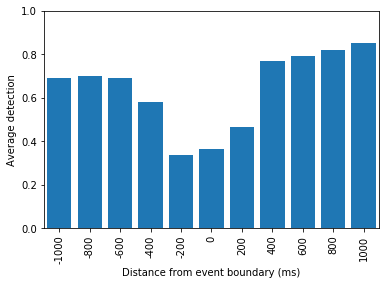

In [54]:
fig=plt.figure()

plt.bar(top_actual_distances,top_actual_spaces)
plt.xlim(-5.5,5.5)
plt.ylim(0,1)
plt.xticks(np.arange(-5,6),np.arange(-5,6)*200,rotation=90)
plt.xlabel('Distance from event boundary (ms)')
plt.ylabel('Average detection')

fig.savefig('pngs/exp2_tempprobe/detection_by_closest_distance_to_boundary_zoomed.png')

###  Pixel changes

Boundary trials: N = 54; Mean pixel change= 0.056; Median= 0.030
Non-boundary trials: N = 658;  Mean pixel change= 0.047; Median= 0.037


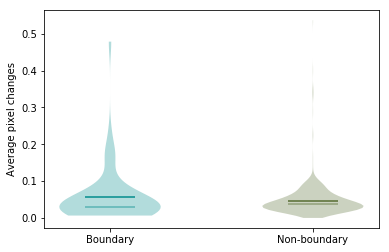

In [55]:
fig=plt.figure()

v=plt.violinplot(np.unique(probes_boundaries_pix),positions=[0],showextrema=False,
                 showmeans=True,showmedians=True)
v['bodies'][0].set_facecolor('darkcyan')
v['cmeans'].set_color('darkcyan')
v['cmedians'].set_color('darkcyan')
v['cmedians'].set_alpha(0.5)

v=plt.violinplot(np.unique(probes_non_boundaries_pix)[~np.isnan(np.unique(probes_non_boundaries_pix))],positions=[1],showextrema=False,
                 showmeans=True,showmedians=True)
v['bodies'][0].set_facecolor('darkolivegreen')
v['cmeans'].set_color('darkolivegreen')
v['cmedians'].set_color('darkolivegreen')
v['cmedians'].set_alpha(0.5)

plt.xticks([0,1],['Boundary','Non-boundary'])
plt.ylabel('Average pixel changes')


print('Boundary trials: N = %d; Mean pixel change= %0.3f; Median= %0.3f'%(len(np.unique(probes_boundaries_pix)),
                                                                          np.nanmean(np.unique(probes_boundaries_pix)),
                                                                         np.nanmedian(np.unique(probes_boundaries_pix))))
print('Non-boundary trials: N = %d;  Mean pixel change= %0.3f; Median= %0.3f'% (len(np.unique(probes_non_boundaries_pix)),
                                                                                np.nanmean(np.unique(probes_non_boundaries_pix)),
                                                                               np.nanmedian(np.unique(probes_non_boundaries_pix))))


fig.savefig('pngs/exp2_tempprobe/pix_change_by_boundary_condition.png')

In [58]:
stats.ttest_ind(np.unique(probes_boundaries_pix),np.unique(probes_non_boundaries_pix),nan_policy='omit')

Ttest_indResult(statistic=1.3630459073867962, pvalue=0.17330569249383296)

In [59]:
detected=np.array(space_bars)
detected[~np.isnan(detected)]=1
detected[np.isnan(detected)]=0

In [60]:
average_detection_boundaries=[]
average_pix_change_boundaries=[]


detected=np.array(probes_boundaries)
detected[~np.isnan(detected)]=1
detected[np.isnan(detected)]=0

for name in np.unique(probes_boundaries_names):
    
    average_detection_boundaries.append(np.nanmean(detected[np.where(probes_boundaries_names==name)[0]]))
    average_pix_change_boundaries.append(np.nanmean(probes_boundaries_pix[np.where(probes_boundaries_names==name)[0]]))
    
average_detection_boundaries=np.array(average_detection_boundaries)
average_pix_change_boundaries=np.array(average_pix_change_boundaries)



average_detection_non_boundaries=[]
average_pix_change_non_boundaries=[]

detected=np.array(probes_non_boundaries)
detected[~np.isnan(detected)]=1
detected[np.isnan(detected)]=0

for name in np.unique(probes_non_boundaries_names):
    
    average_detection_non_boundaries.append(np.nanmean(detected[np.where(probes_non_boundaries_names==name)[0]]))
    average_pix_change_non_boundaries.append(np.nanmean(probes_non_boundaries_pix[np.where(probes_non_boundaries_names==name)[0]]))
    
average_detection_non_boundaries=np.array(average_detection_non_boundaries)
average_pix_change_non_boundaries=np.array(average_pix_change_non_boundaries)


/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice


LinregressResult(slope=-1.0190058531058452, intercept=0.43289187725764067, rvalue=-0.3030483666380826, pvalue=0.0259137913614207, stderr=0.44436991393944975)
LinregressResult(slope=0.4234226842707297, intercept=0.6029003703724307, rvalue=0.06240357921336551, pvalue=0.11223104587030142, stderr=0.2662350401194991)


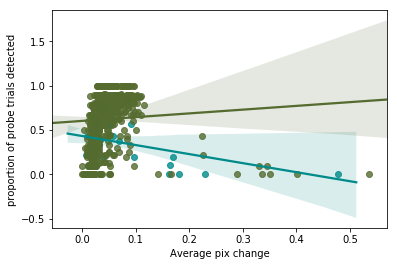

In [62]:
fig=plt.figure()

sns.regplot(average_pix_change_boundaries,average_detection_boundaries,color='darkcyan')
plt.xlabel('Average pix change')
plt.ylabel('proportion of probe trials detected')

print(stats.linregress(np.array(average_pix_change_boundaries)[~np.isnan(average_pix_change_boundaries)],
                       np.array(average_detection_boundaries)[~np.isnan(average_pix_change_boundaries)]))

sns.regplot(average_pix_change_non_boundaries,average_detection_non_boundaries,color='darkolivegreen')

print(stats.linregress(np.array(average_pix_change_non_boundaries)[~np.isnan(average_pix_change_non_boundaries)],
                       np.array(average_detection_non_boundaries)[~np.isnan(average_pix_change_non_boundaries)]))


fig.savefig('pngs/exp2_tempprobe/pix_change_detection_by_boundary_condition.png')

LinregressResult(slope=4.341264657174386, intercept=0.26807654833138667, rvalue=0.3846027586884277, pvalue=0.0069537592216561365, stderr=1.53626211424611)


/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


LinregressResult(slope=6.72049879734884, intercept=0.3503232337716153, rvalue=0.5109774467722684, pvalue=5.331913482535574e-43, stderr=0.45222357874070407)


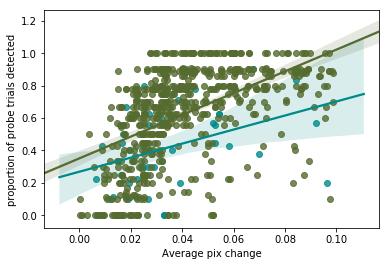

In [63]:
fig=plt.figure()
sns.regplot(average_pix_change_boundaries[average_pix_change_boundaries<0.1],
            average_detection_boundaries[average_pix_change_boundaries<0.1],color='darkcyan')
plt.xlabel('Average pix change')
plt.ylabel('proportion of probe trials detected')

print(stats.linregress(np.array(average_pix_change_boundaries)[average_pix_change_boundaries<0.1],
                       np.array(average_detection_boundaries)[average_pix_change_boundaries<0.1]))

sns.regplot(average_pix_change_non_boundaries[average_pix_change_non_boundaries<0.1],
            average_detection_non_boundaries[average_pix_change_non_boundaries<0.1],color='darkolivegreen')

print(stats.linregress(np.array(average_pix_change_non_boundaries)[average_pix_change_non_boundaries<0.1],
                       np.array(average_detection_non_boundaries)[average_pix_change_non_boundaries<0.1]))


fig.savefig('pngs/exp2_tempprobe/pix_change_detection_by_boundary_condition_zoomed.png')

In [64]:
from sklearn.linear_model import LogisticRegression
logres=LogisticRegression()
nans=np.isnan(np.array(pixel_change[probe_idxs]))
logres.fit(np.array(pixel_change[probe_idxs])[~nans].reshape(-1,1),detected[probe_idxs][~nans])

IndexError: index 5774 is out of bounds for axis 0 with size 5774

In [ ]:
logres.coef_

### RT Info

In [65]:
probe_num=np.array([i.split('_')[-1].split('.')[0] for i in names],dtype=int)
idxs=np.argsort(probe_num)


In [66]:
len(probe_num)

9469

In [67]:
len(rts)

9469

Text(0, 0.5, 'RT')

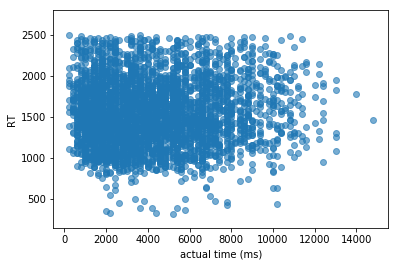

In [89]:
plt.scatter((probe_num)[idxs]*iti,rts[idxs],alpha=0.6)
ident = [np.min((probe_num)[idxs]*iti), np.max((probe_num)[idxs]*iti)]
plt.ylim(150,2800)
plt.xlabel('actual time (ms)')
plt.axhline(y=0,linestyle='dashed',color='black')
plt.ylabel('RT')

In [75]:
stats.pearsonr((probe_num)[~np.isnan(rts)]*iti,rts[~np.isnan(rts)])

(0.04684210983364754, 0.0037504064469634324)

1546.5779984321923


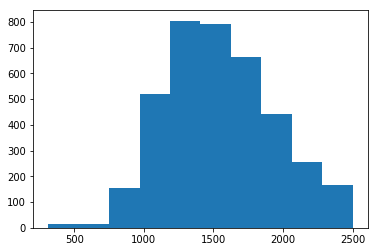

In [71]:
plt.hist(rts)
print(np.nanmean(rts))

1547.52588483888
1459.0487804878048


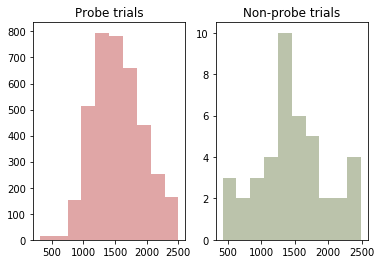

In [68]:
fig,ax=plt.subplots(1,2)
ax[0].hist(rts[probe_idxs],color='firebrick',alpha=0.4,label='probe')
print(np.nanmean(rts[probe_idxs]))
ax[0].set_title('Probe trials')
ax[1].hist(rts[nonprobe_idxs],color='darkolivegreen',alpha=0.4,label='non-probe')
print(np.nanmean(rts[nonprobe_idxs]))
ax[1].set_title('Non-probe trials')

fig.savefig('pngs/exp2_tempprobe/rts_by_probe_condition.png')

ValueError: x and y must be the same size

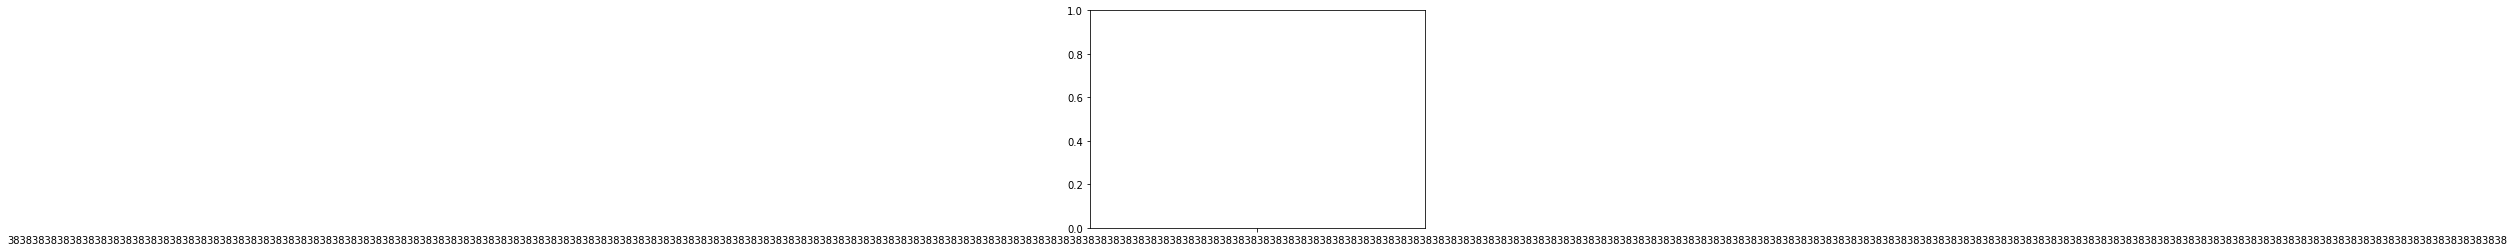

In [70]:
plt.scatter((probe_num)[idxs]*iti,np.log(rts),alpha=0.6)
plt.xlabel('actual time (ms)')
plt.axhline(y=np.log(min_rt),linestyle='dashed',color='black')
plt.axhline(y=np.log(max_rt),linestyle='dashed',color='black')
plt.ylabel('log RT')

In [71]:
stats.pearsonr((probe_num)[~np.isnan(rts)]*iti,np.log(rts[~np.isnan(rts)]))

TypeError: only integer scalar arrays can be converted to a scalar index

7.310384707545292


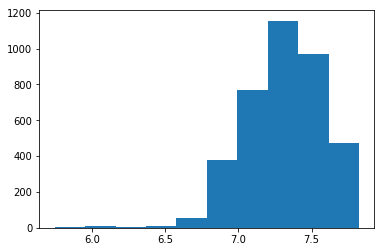

In [72]:
plt.hist(np.log(rts))
print(np.nanmean(np.log(rts)))

Text(0, 0.5, 'RT')

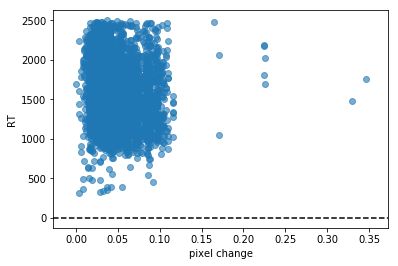

In [73]:
plt.scatter(pixel_change,rts,alpha=0.6)
plt.xlabel('pixel change')
plt.axhline(y=0,linestyle='dashed',color='black')
plt.ylabel('RT')

In [74]:
stats.pearsonr((probe_num)[~np.isnan(rts)]*iti,rts[~np.isnan(rts)])

TypeError: only integer scalar arrays can be converted to a scalar index

### RT and Boundary

In [75]:
with open('boundary_dictionary.json') as f:
    boundary_info = json.load(f)

Boundary: 1614.1028571428571
Non boundary: 1544.2993630573249


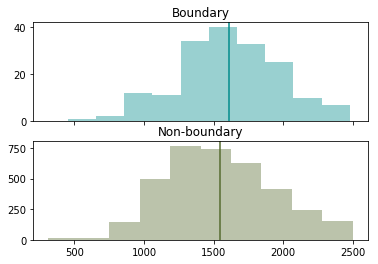

In [76]:
print('Boundary:',np.nanmean(probes_boundaries_rts))
print('Non boundary:',np.nanmean(probes_non_boundaries_rts))

fig,ax=plt.subplots(2,1,sharex=True)

ax[0].hist(probes_boundaries_rts,alpha=0.4,color='darkcyan')
ax[0].axvline(x=np.nanmean(probes_boundaries_rts),ymin=0,ymax=1,color='darkcyan')
ax[0].set_title('Boundary')

ax[1].hist(probes_non_boundaries_rts,alpha=0.4,color='darkolivegreen')
ax[1].axvline(x=np.nanmean(probes_non_boundaries_rts),ymin=0,ymax=1,color='darkolivegreen')
ax[1].set_title('Non-boundary')

fig.savefig('pngs/exp2_tempprobe/rts_by_boundary_condition.png')

In [77]:
stats.ttest_ind(probes_boundaries_rts,probes_non_boundaries_rts,nan_policy='omit')

Ttest_indResult(statistic=2.3379380146868374, pvalue=0.019442303614147217)

Boundary: 7.358691387895164
Non boundary: 7.309278454485743


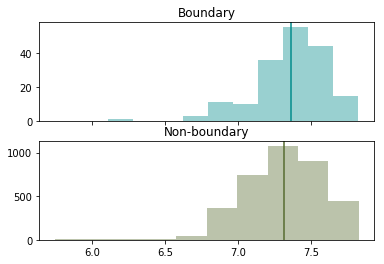

In [78]:
print('Boundary:',np.nanmean(np.log(probes_boundaries_rts)))
print('Non boundary:',np.nanmean(np.log(probes_non_boundaries_rts)))

fig,ax=plt.subplots(2,1,sharex=True)

ax[0].hist(np.log(probes_boundaries_rts),alpha=0.4,color='darkcyan')
ax[0].axvline(x=np.nanmean(np.log(probes_boundaries_rts)),ymin=0,ymax=1,color='darkcyan')
ax[0].set_title('Boundary')

ax[1].hist(np.log(probes_non_boundaries_rts),alpha=0.4,color='darkolivegreen')
ax[1].axvline(x=np.nanmean(np.log(probes_non_boundaries_rts)),ymin=0,ymax=1,color='darkolivegreen')
ax[1].set_title('Non-boundary')

fig.savefig('pngs/exp2_tempprobe/log_rts_by_boundary_condition.png')

In [79]:
stats.ttest_ind(np.log(probes_boundaries_rts),np.log(probes_non_boundaries_rts),nan_policy='omit')

Ttest_indResult(statistic=2.4319360229674247, pvalue=0.015064448090583143)

### Event Type Categories

In [80]:
with open('boundary_dictionary.json') as f:
    boundary_info = json.load(f)

In [81]:
detected=np.array(space_bars[probe_idxs])
detected[~np.isnan(detected)]=1

In [82]:
print(len(names[probe_idxs]))
probe_names=names[probe_idxs]

6257


In [83]:
condition_boundaries=dict({'collision':[],'containment':[],'falling':[],'occlusion':[],'noboundary':[]})
condition_boundaries_conf=dict({'collision':[],'containment':[],'falling':[],'occlusion':[],'noboundary':[]})
condition_boundaries_pix=dict({'collision':[],'containment':[],'falling':[],'occlusion':[],'noboundary':[]})
condition_boundaries_rt=dict({'collision':[],'containment':[],'falling':[],'occlusion':[],'noboundary':[]})

for i, probe in enumerate(probe_names):
    base=probe.split('/')[0]
    probe_num=probe.split('_')[-1].split('.')[0]

    for key in boundary_info[base].keys():
        boundary_locations=boundary_info[base][key]
        
        if np.int(probe_num) in boundary_locations:
            condition_boundaries[key]=np.hstack((condition_boundaries[key],[detected[i]]))
            condition_boundaries_conf[key]=np.hstack((condition_boundaries_conf[key],[confidence_z[probe_idxs][i]]))
            condition_boundaries_pix[key]=np.hstack((condition_boundaries_pix[key],[pixel_change[probe_idxs][i]]))
            condition_boundaries_rt[key]=np.hstack((condition_boundaries_rt[key],[rts[probe_idxs][i]]))
            
            
    all_boundary_locations=np.hstack(list(boundary_info[base].values()))
    
    if np.int(probe_num) not in all_boundary_locations:
        
        condition_boundaries['noboundary']=np.hstack((condition_boundaries['noboundary'],[detected[i]]))
        condition_boundaries_conf['noboundary']=np.hstack((condition_boundaries_conf['noboundary'],[confidence_z[probe_idxs][i]]))
        condition_boundaries_pix['noboundary']=np.hstack((condition_boundaries_pix['noboundary'],[pixel_change[probe_idxs][i]]))
        condition_boundaries_rt['noboundary']=np.hstack((condition_boundaries_rt['noboundary'],[rts[probe_idxs][i]]))
        

In [84]:
for i, key in enumerate(condition_boundaries.keys()):
    print(len(condition_boundaries[key]))

68
127
109
179
5774


collision
0.3382352941176471
containment
0.3228346456692913
falling
0.29357798165137616
occlusion
0.441340782122905
noboundary
0.6253896778662972


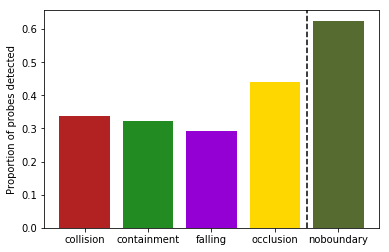

In [85]:
colors=['firebrick','forestgreen','darkviolet','gold','darkolivegreen']

vals=[]

fig=plt.figure()
for i, key in enumerate(condition_boundaries.keys()):
    print(key)
    plt.bar(i,np.sum(condition_boundaries[key]==1)/len(condition_boundaries[key]),color=colors[i])
    print(np.sum(condition_boundaries[key]==1)/len(condition_boundaries[key]))
    vals.append(np.sum(condition_boundaries[key]==1))
    
plt.xticks(np.arange(len(condition_boundaries.keys())),condition_boundaries.keys())
plt.axvline(3.5,color='black',linestyle='dashed')
plt.ylabel('Proportion of probes detected')

fig.savefig('pngs/exp2_tempprobe/detection_by_boundary_type.png')

In [86]:
for i, key in enumerate(condition_boundaries.keys()):
    print(key)
    
    table=[[np.sum(np.isnan(condition_boundaries[key])),np.sum(condition_boundaries[key]==1)]
           ,[np.sum(np.isnan(condition_boundaries['noboundary'])),np.sum(condition_boundaries['noboundary']==1)]]
    
    print(table)
    print(stats.fisher_exact(table, alternative='two-sided'))

collision
[[45, 23], [2163, 3611]]
(3.2662968099861303, 3.2161844699946734e-06)
containment
[[86, 41], [2163, 3611]]
(3.501753436397055, 1.3131625493731156e-11)
falling
[[77, 32], [2163, 3611]]
(4.01709142394822, 4.433698617927927e-12)
occlusion
[[100, 79], [2163, 3611]]
(2.113215938950239, 9.95851830937078e-07)
noboundary
[[2163, 3611], [2163, 3611]]
(1.0, 1.0)


collision
-0.30465296082330795
containment
-0.3221124249400905
falling
-0.21845425900718296
occlusion
-0.1314951232487048
noboundary
0.07106820324951166


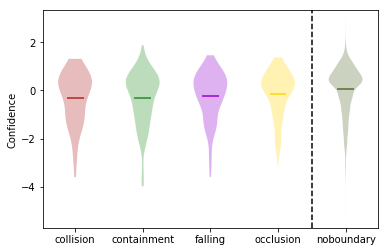

In [88]:
fig=plt.figure()

for i, key in enumerate(condition_boundaries_conf.keys()):
    v=plt.violinplot(condition_boundaries_conf[key][~np.isnan(condition_boundaries_conf[key])],positions=[i],showextrema=False,showmeans=True)
    v['bodies'][0].set_facecolor(colors[i])
    v['cmeans'].set_color(colors[i])
    
    print(key)
    print(np.nanmean(condition_boundaries_conf[key]))
    
plt.xticks(np.arange(len(condition_boundaries.keys())),condition_boundaries.keys())
plt.axvline(3.5,color='black',linestyle='dashed')
plt.ylabel('Confidence')

fig.savefig('pngs/exp2_tempprobe/confidence_by_boundary_type.png')


collision
0.08311180167073902
containment
0.04147086425876935
falling
0.10619517720121742
occlusion
0.02529838739926269
noboundary
0.04705728530928135


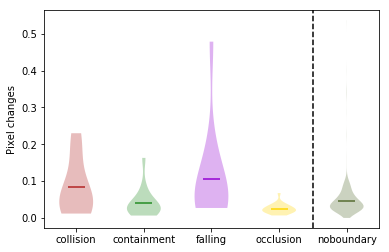

In [89]:
fig=plt.figure()

for i, key in enumerate(condition_boundaries_pix.keys()):
    v=plt.violinplot(np.unique(condition_boundaries_pix[key][~np.isnan(condition_boundaries_pix[key])]),positions=[i],showextrema=False,showmeans=True)
    v['bodies'][0].set_facecolor(colors[i])
    v['cmeans'].set_color(colors[i])
    
    print(key)
    print(np.nanmean(np.unique(condition_boundaries_pix[key])))


plt.xticks(np.arange(len(condition_boundaries.keys())),condition_boundaries.keys())
plt.axvline(3.5,color='black',linestyle='dashed')
plt.ylabel('Pixel changes')


fig.savefig('pngs/exp2_tempprobe/pix_change_by_boundary_type.png')

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


collision
1575.5217391304348
containment
1538.3170731707316
falling
1694.5
occlusion
1632.1012658227849
noboundary
1544.0346260387812


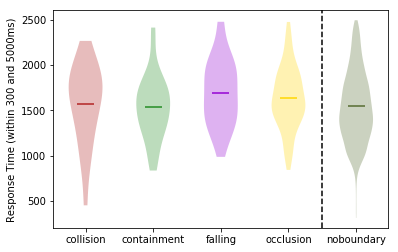

In [90]:
fig=plt.figure()

for i, key in enumerate(condition_boundaries_rt.keys()):
    
    restricted_rt=condition_boundaries_rt[key][condition_boundaries_rt[key]>min_rt]
    restricted_rt=restricted_rt[restricted_rt<max_rt]
    
    v=plt.violinplot(restricted_rt,positions=[i],showextrema=False,showmeans=True)
    v['bodies'][0].set_facecolor(colors[i])
    v['cmeans'].set_color(colors[i])
    
    print(key)
    print(np.nanmean(restricted_rt))


plt.xticks(np.arange(len(condition_boundaries.keys())),condition_boundaries.keys())
plt.axvline(3.5,color='black',linestyle='dashed')
plt.ylabel('Response Time (within 300 and 5000ms)')

fig.savefig('pngs/exp2_tempprobe/rts_by_boundary_type.png')

collision
7.311533705050803
containment
7.311985103425466
falling
7.411982790515057
occlusion
7.375074419348851
noboundary
7.3091358595947815


/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Log RT(within 300 and 5000ms)')

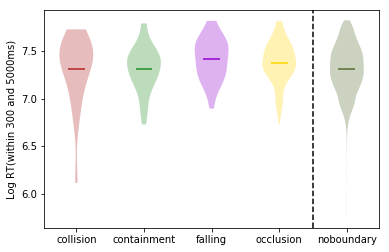

In [218]:
for i, key in enumerate(condition_boundaries_rt.keys()):
    
    restricted_rt=condition_boundaries_rt[key][condition_boundaries_rt[key]>min_rt]
    restricted_rt=restricted_rt[restricted_rt<max_rt]
    
    v=plt.violinplot(np.log(restricted_rt),positions=[i],showextrema=False,showmeans=True)
    v['bodies'][0].set_facecolor(colors[i])
    v['cmeans'].set_color(colors[i])
    
    print(key)
    print(np.nanmean(np.log(restricted_rt)))


plt.xticks(np.arange(len(condition_boundaries.keys())),condition_boundaries.keys())
plt.axvline(3.5,color='black',linestyle='dashed')
plt.ylabel('Log RT(within 300 and 5000ms)')

## Each probe video

In [219]:
probe_colors=dict({'collision':'firebrick','containment':'forestgreen',
                   'falling':'darkviolet','occlusion':'gold'})
view_all=0

In [220]:
unique_vids=np.unique([i.split('/')[0] for i in names[probe_idxs]])

In [221]:
i=24
uv=unique_vids[i]

In [232]:
uv_probes=[(i,j) for (i,j) in enumerate(names[probe_idxs]) if uv in j]
uv_idxs=np.array(np.stack(uv_probes)[:,0],dtype=int)
uv_probe_num=np.array([i.split('_')[-1].split('.')[0] for i in np.stack(uv_probes)[:,1]],dtype=int)

spaces=np.array(space_bars[probe_idxs])[uv_idxs]
spaces[~np.isnan(spaces)]=1
spaces[np.isnan(spaces)]=-1
confidences=np.array(confidence_z[probe_idxs])[uv_idxs]

confidence_probe_values=spaces #+np.array(confidences)
confidence_probe_values

array([-1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
        1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1

occlusion boundaries were at: [15, 23]
collision boundaries were at: [30]



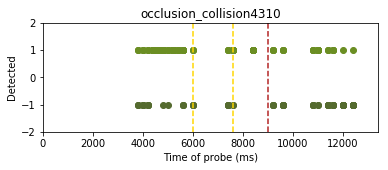

In [233]:
plt.figure(figsize=(6,2))
plt.title(uv)
plt.scatter((uv_probe_num*iti+countdown)[~np.isnan(np.array(space_bars[probe_idxs])[uv_idxs])],
            confidence_probe_values[np.array(~np.isnan(space_bars[probe_idxs])[uv_idxs])],color='olivedrab')
plt.scatter((uv_probe_num*iti+countdown)[np.isnan(np.array(space_bars[probe_idxs])[uv_idxs])],
            confidence_probe_values[np.array(np.isnan(space_bars[probe_idxs])[uv_idxs])],color='darkolivegreen')

plt.xlim(0,np.max(uv_probe_num*iti+countdown)+1000)
plt.ylim(-2,2)
plt.xlabel('Time of probe (ms)')
plt.ylabel('Detected')

if view_all==1:
    locations=np.hstack(list(boundary_info[uv].values()))
    [plt.axvline((i*iti+countdown),color='red',linestyle='dashed') for i in locations]
    
    print('boundaries were at:',(locations))
    print()
    
else:
    for key in boundary_info[uv].keys():
        color=probe_colors[key]
        locations=boundary_info[uv][key]
        print(key,'boundaries were at:',locations)
        [plt.axvline((i*iti+countdown),color=color,linestyle='dashed') for i in locations]
            
    print()

In [234]:
det_probe_means=[]
for p in np.unique(uv_probe_num*iti+countdown):
    det_probe_means.append(np.nanmean(confidence_probe_values[(uv_probe_num*iti+countdown)==p]))
    
det_probe_means=np.array(det_probe_means)

In [235]:
det_probe_means

array([ 0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.8       ,  0.71428571,  1.        ,  1.        ,  0.4       ,
       -0.14285714, -0.11111111,  0.55555556,  1.        ,  0.        ,
       -0.2       ,  0.11111111,  0.55555556, -0.33333333, -0.11111111,
       -0.77777778, -0.77777778])

occlusion boundaries were at: [15, 23]
collision boundaries were at: [30]



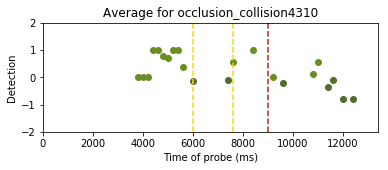

In [236]:
plt.figure(figsize=(6,2))
plt.title('Average for %s' %uv)
plt.scatter(np.unique(uv_probe_num*iti+countdown)[det_probe_means>=0],
            det_probe_means[det_probe_means>=0],color='olivedrab')

plt.scatter(np.unique(uv_probe_num*iti+countdown)[det_probe_means<0],
            det_probe_means[det_probe_means<0],color='darkolivegreen')

#plt.axhline(0,color='black')
#plt.ylim(np.min(conf_probe_means)-0.5,np.max(conf_probe_means)+5)
#plt.yticks([-1,0,1],['Both missed','1 detected','Both detected'])
plt.ylim(-2,2)
plt.xlim(0,np.max(uv_probe_num*iti+countdown)+1000)
plt.xlabel('Time of probe (ms)')
plt.ylabel('Detection')

if view_all==1:
    locations=np.hstack(list(boundary_info[uv].values()))
    [plt.axvline((i*iti+countdown),color='red',linestyle='dashed') for i in locations]
    
    print('boundaries were at:',(locations))
    print()
    
else:
    for key in boundary_info[uv].keys():
        color=probe_colors[key]
        locations=boundary_info[uv][key]
        print(key,'boundaries were at:',locations)
        [plt.axvline((i*iti+countdown),color=color,linestyle='dashed') for i in locations]
            
    print()

In [250]:

conf_probe_means=[]
conf_probe_all=[]
for p in np.unique(uv_probe_num*iti+countdown):
    conf_probe_means.append(np.nanmean(confidences[(uv_probe_num*iti+countdown)==p]))
    conf_probe_all.append(confidences[(uv_probe_num*iti+countdown)==p])
    
conf_probe_means=np.array(conf_probe_means)
conf_probe_all=np.array(conf_probe_all)

In [251]:
conf_probe_means

array([-0.72345291,  0.10652046,  0.40641844,  0.71272974,  0.27304516,
        0.72314138,  0.3973637 ,  0.47316444,  0.62900975, -0.016429  ,
       -0.18808327, -0.27748762,  0.3771941 ,  0.13512288, -0.62807598,
       -0.46844997, -0.11873095, -0.80540167, -0.25003228, -0.67366021,
       -0.26747145, -0.37079915])

In [252]:
conf_probe_all.shape

(22,)

Text(0, 0.5, 'Confidence values')

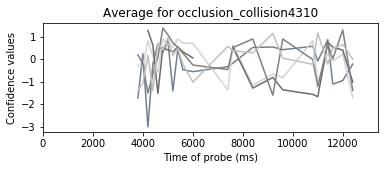

In [100]:
plt.figure(figsize=(6,2))
plt.title('Average for %s' %uv)

colors=['slategrey','lightgrey','dimgrey','grey','silver']

for sub in range(conf_probe_all.shape[1]):
    plt.plot(np.unique(uv_probe_num*iti+countdown),
            conf_probe_all[:,sub],color=colors[sub])

#plt.axhline(0,color='black')
#plt.ylim(np.min(conf_probe_means)-0.5,np.max(conf_probe_means)+5)
#plt.yticks([0,0.5,1],['Both missed','1 detected','Both detected'])
#plt.ylim(-0.5,1.5)
plt.xlim(0,np.max(uv_probe_num*iti+countdown)+1000)
plt.xlabel('Time of probe (ms)')
plt.ylabel('Confidence values')

occlusion boundaries were at: [15, 23]
collision boundaries were at: [30]



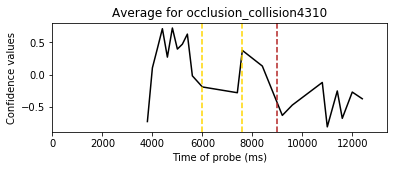

In [253]:
plt.figure(figsize=(6,2))
plt.title('Average for %s' %uv)
plt.plot(np.unique(uv_probe_num*iti+countdown),
            conf_probe_means,color='black')

#plt.axhline(0,color='black')
#plt.ylim(np.min(conf_probe_means)-0.5,np.max(conf_probe_means)+5)
#plt.yticks([0,0.5,1],['Both missed','1 detected','Both detected'])
#plt.ylim(-0.5,1.5)
plt.xlim(0,np.max(uv_probe_num*iti+countdown)+1000)
plt.xlabel('Time of probe (ms)')
plt.ylabel('Confidence values')

if view_all==1:
    locations=np.hstack(list(boundary_info[uv].values()))
    [plt.axvline((i*iti+countdown),color='red',linestyle='dashed') for i in locations]
    
    print('boundaries were at:',(locations))
    print()
    
else:
    for key in boundary_info[uv].keys():
        color=probe_colors[key]
        locations=boundary_info[uv][key]
        print(key,'boundaries were at:',locations)
        [plt.axvline((i*iti+countdown),color=color,linestyle='dashed') for i in locations]
            
    print()

### No probe videos

In [255]:
hallucination_vids=np.array(names[nonprobe_idxs])[~np.isnan(space_bars[nonprobe_idxs])]
hallucination_spaces=np.array(space_bars[nonprobe_idxs])[~np.isnan(space_bars[nonprobe_idxs])]
print(len(hallucination_vids))

41


collision_containment315/non-visible/final_collision_containment315_125ms_70.mp4
[18781.]
collision boundaries were at: [13, 29]
containment boundaries were at: [18]

collision_containment5313/non-visible/final_collision_containment5313_125ms_4.mp4
[5189. 5036.]
collision boundaries were at: [13, 25]
containment boundaries were at: [17]

collision_falling998/non-visible/final_collision_falling998_125ms_62.mp4
[16358. 16860.]
collision boundaries were at: [13]
falling boundaries were at: [26, 48]

collision_occlusion315/non-visible/final_collision_occlusion315_125ms_54.mp4
[16291. 15265.]
collision boundaries were at: [14]
occlusion boundaries were at: [31]

containment_containment4320/non-visible/final_containment_containment4320_125ms_74.mp4
[19264.]
containment boundaries were at: [2, 28, 50]

containment_falling2998/non-visible/final_containment_falling2998_125ms_38.mp4
[11464.]
containment boundaries were at: [22]
falling boundaries were at: [27]

containment_falling998/non-visible

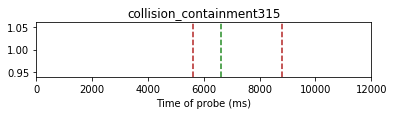

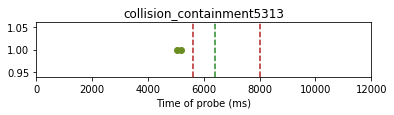

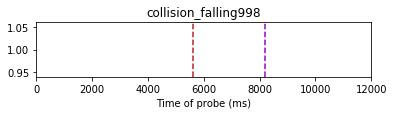

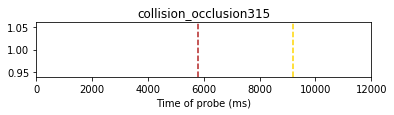

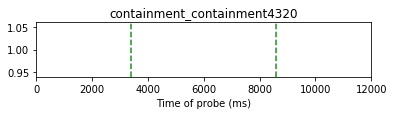

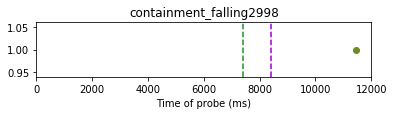

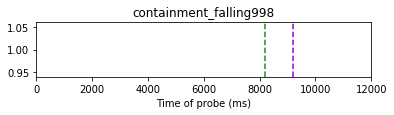

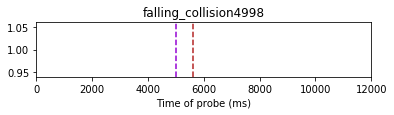

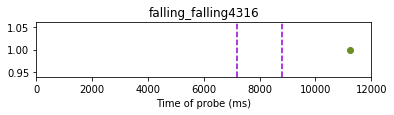

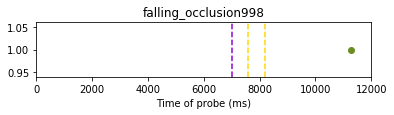

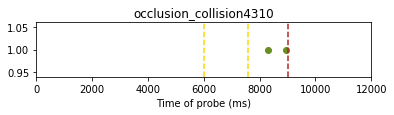

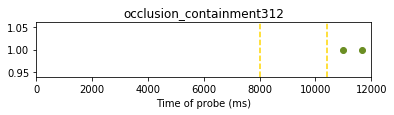

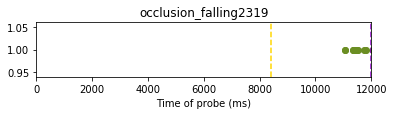

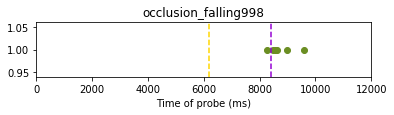

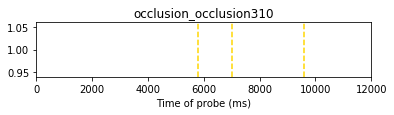

In [262]:

all_distances=[]
for vid in np.unique(hallucination_vids):
    print(vid)
    print(hallucination_spaces[hallucination_vids==vid])

    view_all=0

    uv=vid.split('/')[0]

    plt.figure(figsize=(6,1))
    plt.title(uv)

    hallucinations=(hallucination_spaces[hallucination_vids==vid])
    closest_probes=(hallucinations-countdown)/iti
    
    

    plt.scatter(hallucinations,
                 np.ones(len(hallucinations)),color='olivedrab')

    plt.xlim(0,12000)
    plt.xlabel('Time of probe (ms)')

    if view_all==1:
        locations=np.hstack(list(boundary_info[uv].values()))
        [plt.axvline((i*iti+countdown),color='red',linestyle='dashed') for i in locations]

        print('boundaries were at:',(locations))
        print()

    else:
        for key in boundary_info[uv].keys():
            color=probe_colors[key]
            locations=boundary_info[uv][key]
            print(key,'boundaries were at:',locations)
            [plt.axvline((i*iti+countdown),color=color,linestyle='dashed') for i in locations]

        print()
    
    
    distances=np.zeros((len(closest_probes),len(locations)))
    for l, loc in enumerate(locations):
        distances[:,l]=closest_probes-loc

    min_dist=np.min(distances,axis=1)
    all_distances.extend(np.abs(min_dist))

Text(0.5, 1.0, 'Differences between hallucinated probe and boundaries')

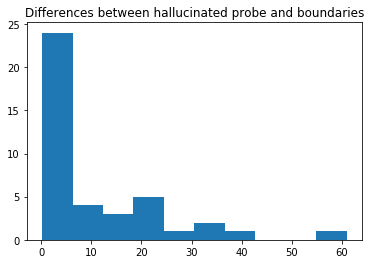

In [266]:
plt.hist(all_distances)
plt.title('Differences between hallucinated probe and boundaries')

In [267]:
print(np.mean(all_distances))

10.803292682926829
